In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import os
import math
import json

In [2]:
base_path = "/shared/2/projects/framing/intermediate_results"
counts_path_country = os.path.join(base_path,'word_counts','by_country')
counts_path_ideology = os.path.join(base_path,'word_counts','by_ideology')
logodds_path = os.path.join(base_path,'log_odds_08-03')

In [3]:
unit_of_analysis = ['bigrams','lex_frame_bigrams','unigrams']
countries = ['EU','GB','US'] #second name in file is most negative log odds , first is most positive
ideologies = ['conservative','liberal']

In [4]:
def load_word_counts_country(country,analysis_unit):
    filename = os.path.join(counts_path_country,country,analysis_unit + '.json')
    with open(filename,'r') as f:
        counts = json.load(f)
    df = pd.DataFrame({'count': counts})
    df.index.rename('ngram',inplace=True)
    df= df.reset_index().sort_values('count',ascending=False)
    return df

In [19]:
def load_word_counts_ideology(ideology,analysis_unit,norm_option='raw'):
    filename = os.path.join(counts_path_ideology,norm_option,ideology,analysis_unit + '.json')
    with open(filename,'r') as f:
        counts = json.load(f)
    df = pd.DataFrame({'count': counts})
    df.index.rename('ngram',inplace=True)
    df= df.reset_index().sort_values('count',ascending=False)
    return df

In [6]:
def load_log_odds(log_odds_path,neg_corpus,pos_corpus,analysis_unit,comparison='country',ideology_option='raw'):
    if comparison == 'country':
        filename = os.path.join(log_odds_path,pos_corpus + '_vs_' + neg_corpus + '_' + analysis_unit + '.tsv')
    else:
        filename = os.path.join(log_odds_path,pos_corpus + '_vs_' + neg_corpus + '_' + ideology_option + '_'+ analysis_unit + '.tsv')
    df = pd.read_csv(filename,sep='\t')
    df.columns=['ngram','log_odds']
    return df

In [7]:
def combine_count_log_odds(logodds,neg_counts,pos_counts):
    neg_counts['frequency'] = neg_counts['count'] / neg_counts['count'].sum()
    neg_logodds = logodds[logodds['log_odds'] < 0]
    neg_logodds = neg_logodds.merge(neg_counts,on='ngram')
    
    pos_counts['frequency'] = pos_counts['count'] / pos_counts['count'].sum()
    pos_logodds = logodds[logodds['log_odds'] > 0]
    pos_logodds = pos_logodds.merge(pos_counts,on='ngram')
    return pd.concat([neg_logodds,pos_logodds])

In [38]:
def plot_log_odds(odds_freq,neg_corpus,pos_corpus,sig_val=1.96,min_freq=1e-5,max_odds=100,min_odds=-100):
    odds_freq = odds_freq[odds_freq['frequency'] >= min_freq]
    x_vals = list(odds_freq['frequency'])
    y_vals = list(odds_freq['log_odds'])
    y_vals = [max(v,min_odds) for v in y_vals] 
    y_vals = [min(v,max_odds) for v in y_vals]
    sizes = [min(12,2*abs(v)) for v in y_vals]
    neg_color, pos_color, insig_color = ('green', 'purple', 'grey')
    colors = []
    annots = []
    
    for index, row in odds_freq.iterrows():
        if row['log_odds'] > sig_val:
            colors.append(pos_color)
            annots.append(row['ngram'])
        elif row['log_odds'] < -sig_val:
            colors.append(neg_color)
            annots.append(row['ngram'])
        else:
            colors.append(insig_color)
            annots.append(None)

    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x_vals, y_vals, c=colors, linewidth=0,s=1)
    for i, annot in enumerate(annots):
        if annot is not None:
            ax.annotate(annot, (x_vals[i], y_vals[i]), color=colors[i],size=sizes[i])
    ax.set_xscale('log')
    ax.set_xlabel('frequency')
    ax.set_ylabel('log odds')
    ax.set_yscale('symlog',linthreshy=15)



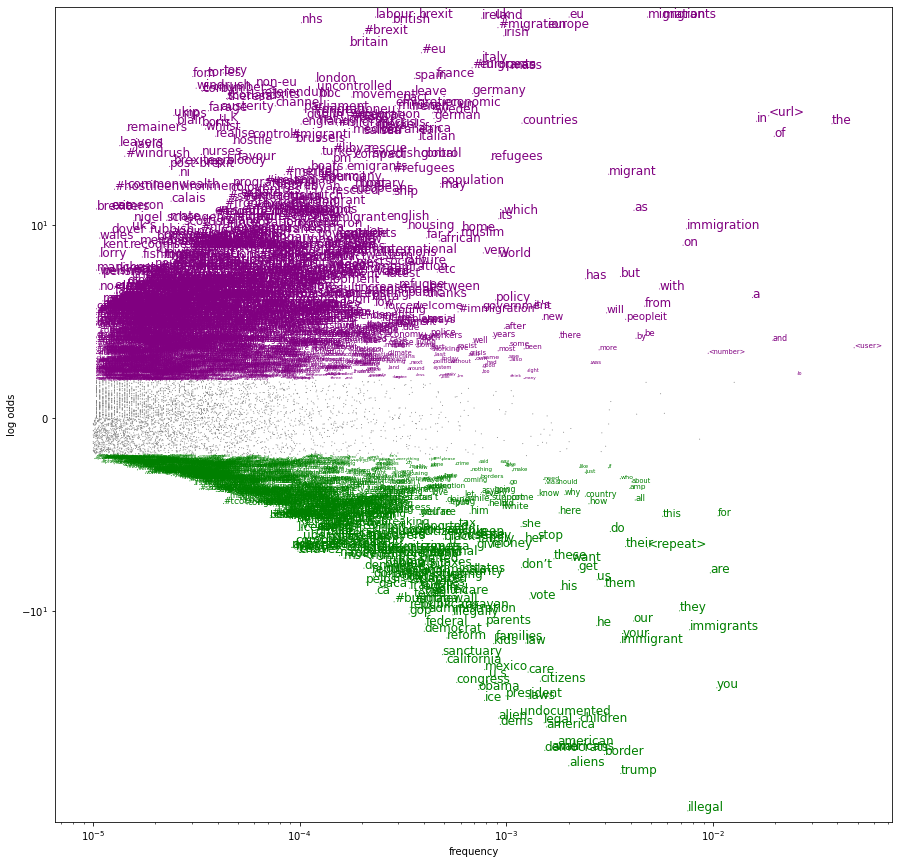

In [42]:
neg_corpus = 'US'
pos_corpus = 'EU'
analysis_unit = 'unigrams'
logodds = load_log_odds(logodds_path,neg_corpus,pos_corpus,analysis_unit,comparison='country')
neg_counts = load_word_counts_country(neg_corpus,analysis_unit)
pos_counts = load_word_counts_country(pos_corpus,analysis_unit)
odds_freq = combine_count_log_odds(logodds,neg_counts,pos_counts)
plot_log_odds(odds_freq,neg_corpus,pos_corpus,sig_val=1.96,min_freq=1e-5,max_odds=40,min_odds=-40)

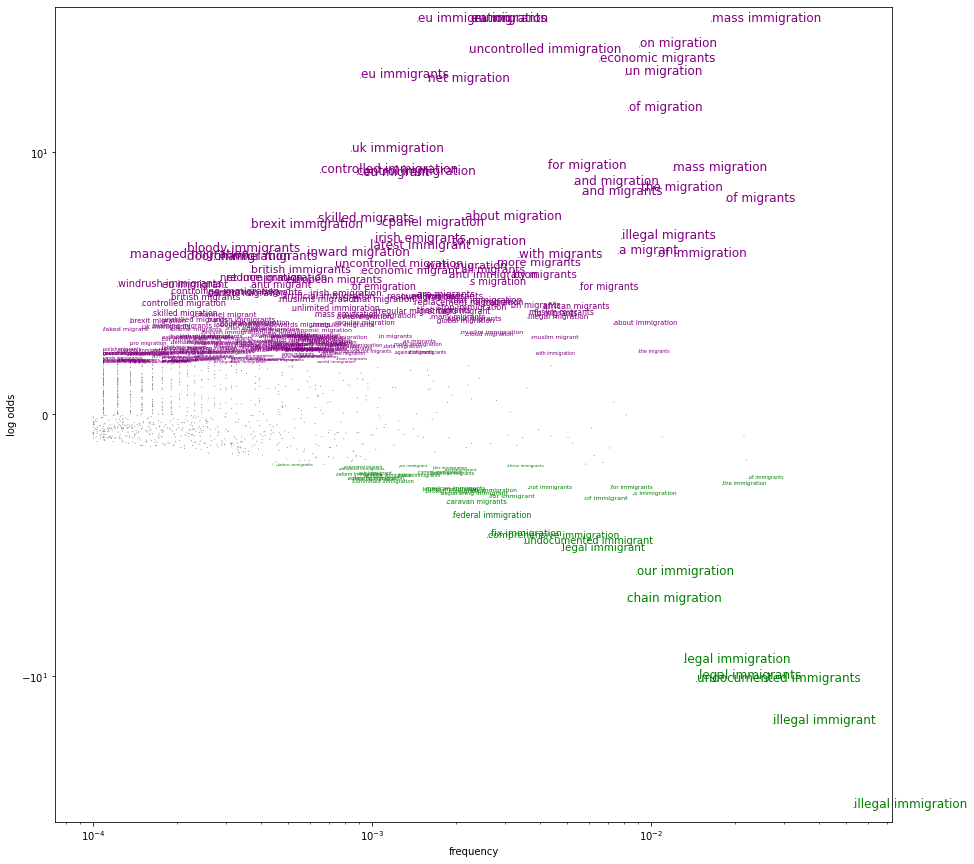

In [41]:
neg_corpus = 'US'
pos_corpus = 'EU'
analysis_unit = 'lex_frame_bigrams'
logodds = load_log_odds(logodds_path,neg_corpus,pos_corpus,analysis_unit,comparison='country')
neg_counts = load_word_counts_country(neg_corpus,analysis_unit)
pos_counts = load_word_counts_country(pos_corpus,analysis_unit)
odds_freq = combine_count_log_odds(logodds,neg_counts,pos_counts)
plot_log_odds(odds_freq,neg_corpus,pos_corpus,sig_val=1.96,min_freq=1e-4,max_odds=15,min_odds=-15)

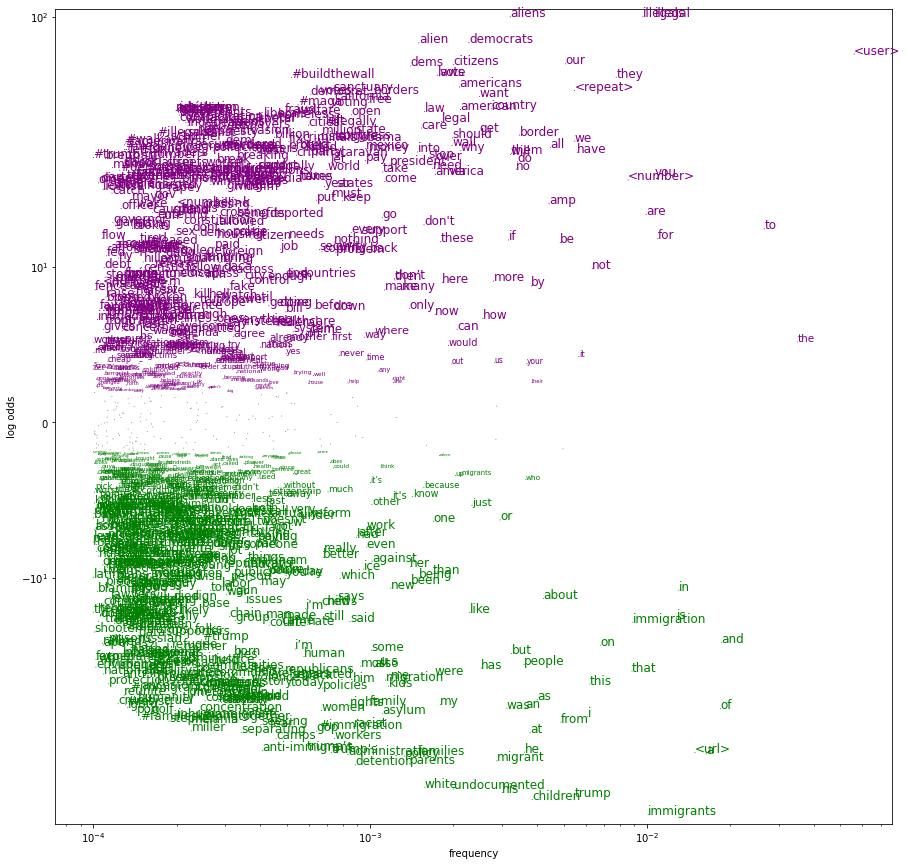

In [40]:
neg_corpus = 'liberal'
pos_corpus = 'conservative'
analysis_unit = 'unigrams'
logodds = load_log_odds(logodds_path,neg_corpus,pos_corpus,analysis_unit,comparison='ideology')
neg_counts = load_word_counts_ideology(neg_corpus,analysis_unit)
pos_counts = load_word_counts_ideology(pos_corpus,analysis_unit)
odds_freq = combine_count_log_odds(logodds,neg_counts,pos_counts)
plot_log_odds(odds_freq,neg_corpus,pos_corpus,sig_val=1.96,min_freq=1e-4,max_odds=100,min_odds=-100)

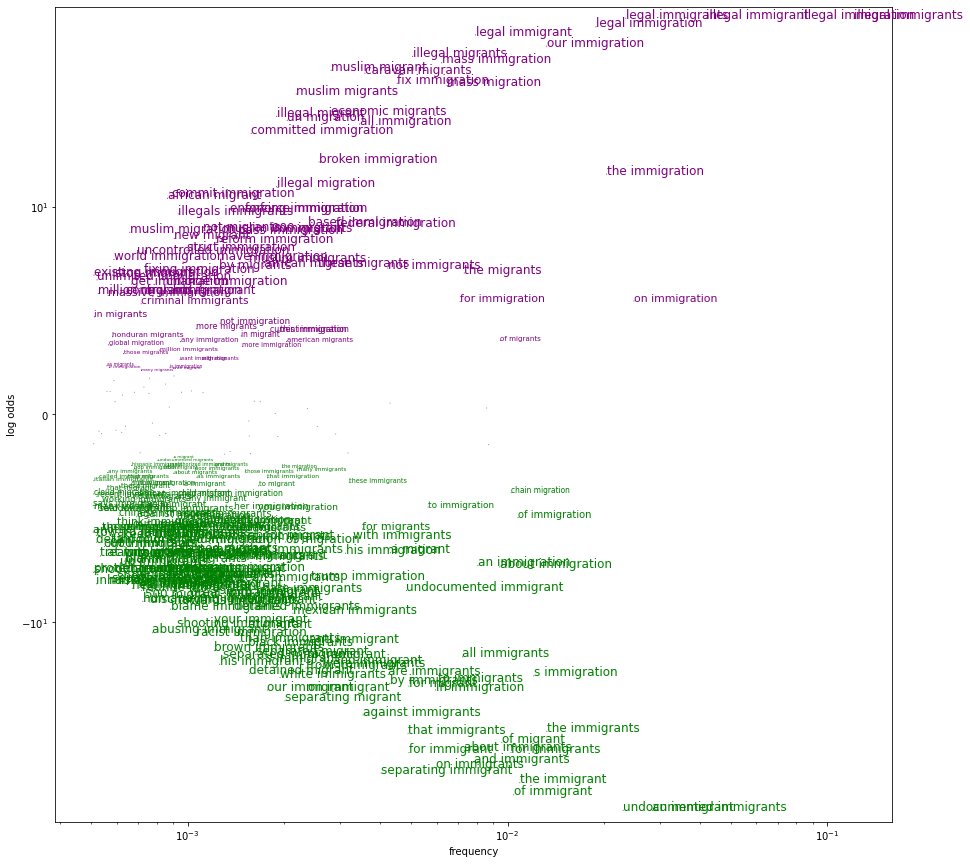

In [39]:
neg_corpus = 'liberal'
pos_corpus = 'conservative'
analysis_unit = 'lex_frame_bigrams'
logodds = load_log_odds(logodds_path,neg_corpus,pos_corpus,analysis_unit,comparison='ideology')
neg_counts = load_word_counts_ideology(neg_corpus,analysis_unit)
pos_counts = load_word_counts_ideology(pos_corpus,analysis_unit)
odds_freq = combine_count_log_odds(logodds,neg_counts,pos_counts)
plot_log_odds(odds_freq,neg_corpus,pos_corpus,sig_val=1.96,min_freq=5e-4,max_odds=30,min_odds=-30)